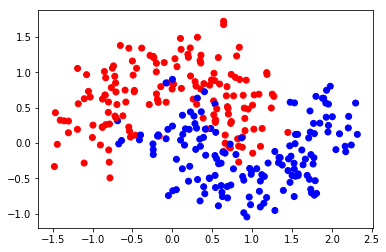

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import tensorflow as tf
from sklearn.utils import shuffle

N = 300
X, y = datasets.make_moons(N, noise=0.3)
# yに0か1が入っているので、0なら赤、1なら青とする
color = ['red' if i==0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], color=color)

In [2]:
from sklearn.model_selection import train_test_split

Y = y.reshape(N, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))

240 240
60 60


In [3]:
num_hidden = 3

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [4]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(5000):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

In [6]:
print(correct_prediction.eval(session=sess, feed_dict={
            x: X_test,
            t: Y_test
        }))
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print(accuracy_rate)

[[False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]]
0.516667
